# Proyek Analisis Data: Air Quality
- Nama: Aditya Atallah
- Email: ahdithiya@gmail.com
- Id Dicoding: ahdithya

## Menentukan Pertanyaan Bisnis

Menentukan pertanyaan Bisnis sangat penting untuk mengetahui tujuan yang ingin dicapai dalam pengerjaan analisis yang dilakukan

- Bagaimana tren kualitas udara selama 2013-2017?
- Bagaimana perbandingan kualitas udara antar lokasi tiap tahunnya?



## Menyaipkan semua library yang dibutuhkan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/raw/
  inflating: data/raw/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Wanliu_20130301-20170228.csv  
  inflating: data/raw/PRSA_Data_Wanshouxigong_20130301-20170228.csv  


## Data Wrangling
Malakukan proses pengumpulan, menilai dan membersihkan data, agar data menjadi lebih berkualitas dan dapata menghasilkan analisis yang lebih akurat.

### Gathering Data
Pengumpulan dataset yang akan digunakan, data yang akan digunakan data kualitas air pada setiap stasiun di China

In [3]:
# import data
Aotizhongxin = pd.read_csv('./data/raw/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('./data/raw/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('./data/raw/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('./data/raw/PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv('./data/raw/PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('./data/raw/PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('./data/raw/PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('./data/raw/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('./data/raw/PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('./data/raw/PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('./data/raw/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('./data/raw/PRSA_Data_Wanshouxigong_20130301-20170228.csv')


In [4]:
# merge data
data = pd.concat([Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong], axis=0)
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data
Menilai kualitas data dan mencari error pada data

In [5]:
# melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [6]:
data.shape

(420768, 18)

Pada ringkasan informasi data terdapat jumlah sample data yang tidak sesuai antar column yang berarti missing value dan untuk type data telah sesuai

In [7]:
# mengecek misiing value
data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Jumlah data missing value sangatlah banyak, sehingga akan dilakukan imputasi

In [8]:
# melihat duplikasi data
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

Jumlah data duplikat: 0


tidak terdapat data yang duplikat

In [9]:
# melihat ringaksan data
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Pada ringkasan statistik terlihat nilai statistik MAX yang cukup tinggi seperti PM10, PM2.5, CO, O3 bernilai 999 ke atas.

### Cleaning Data
berdasarkan assessing data yang dilakukan yaitu terdapat missing value, maka akan dilakukan cleaning data

#### Missing Value
berdasarkan ringkasan statistik data, maka akan melakukan imputasi dengan mengisi missing value dengan nilai median

In [10]:
# mengisi missing value pada data numeric
data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].mean(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data["TEMP"].fillna(data["TEMP"].mean(), inplace=True)
data["PRES"].fillna(data["PRES"].mean(), inplace=True)
data["DEWP"].fillna(data["DEWP"].mean(), inplace=True)
data["RAIN"].fillna(data["RAIN"].mean(), inplace=True)
data["WSPM"].fillna(data["WSPM"].mean(), inplace=True)

In [11]:
# Mengecek jumlah data yang sering muncul
data['wd'].value_counts().sort_values(ascending=False).head(1)

NE    43335
Name: wd, dtype: int64

In [12]:
# mengisi missing value pada data kategorik
data['wd'].fillna(data['wd'].mode()[0], inplace=True)

In [13]:
data.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)
Melakukan analisis data untuk mengenal data

### Explore ...

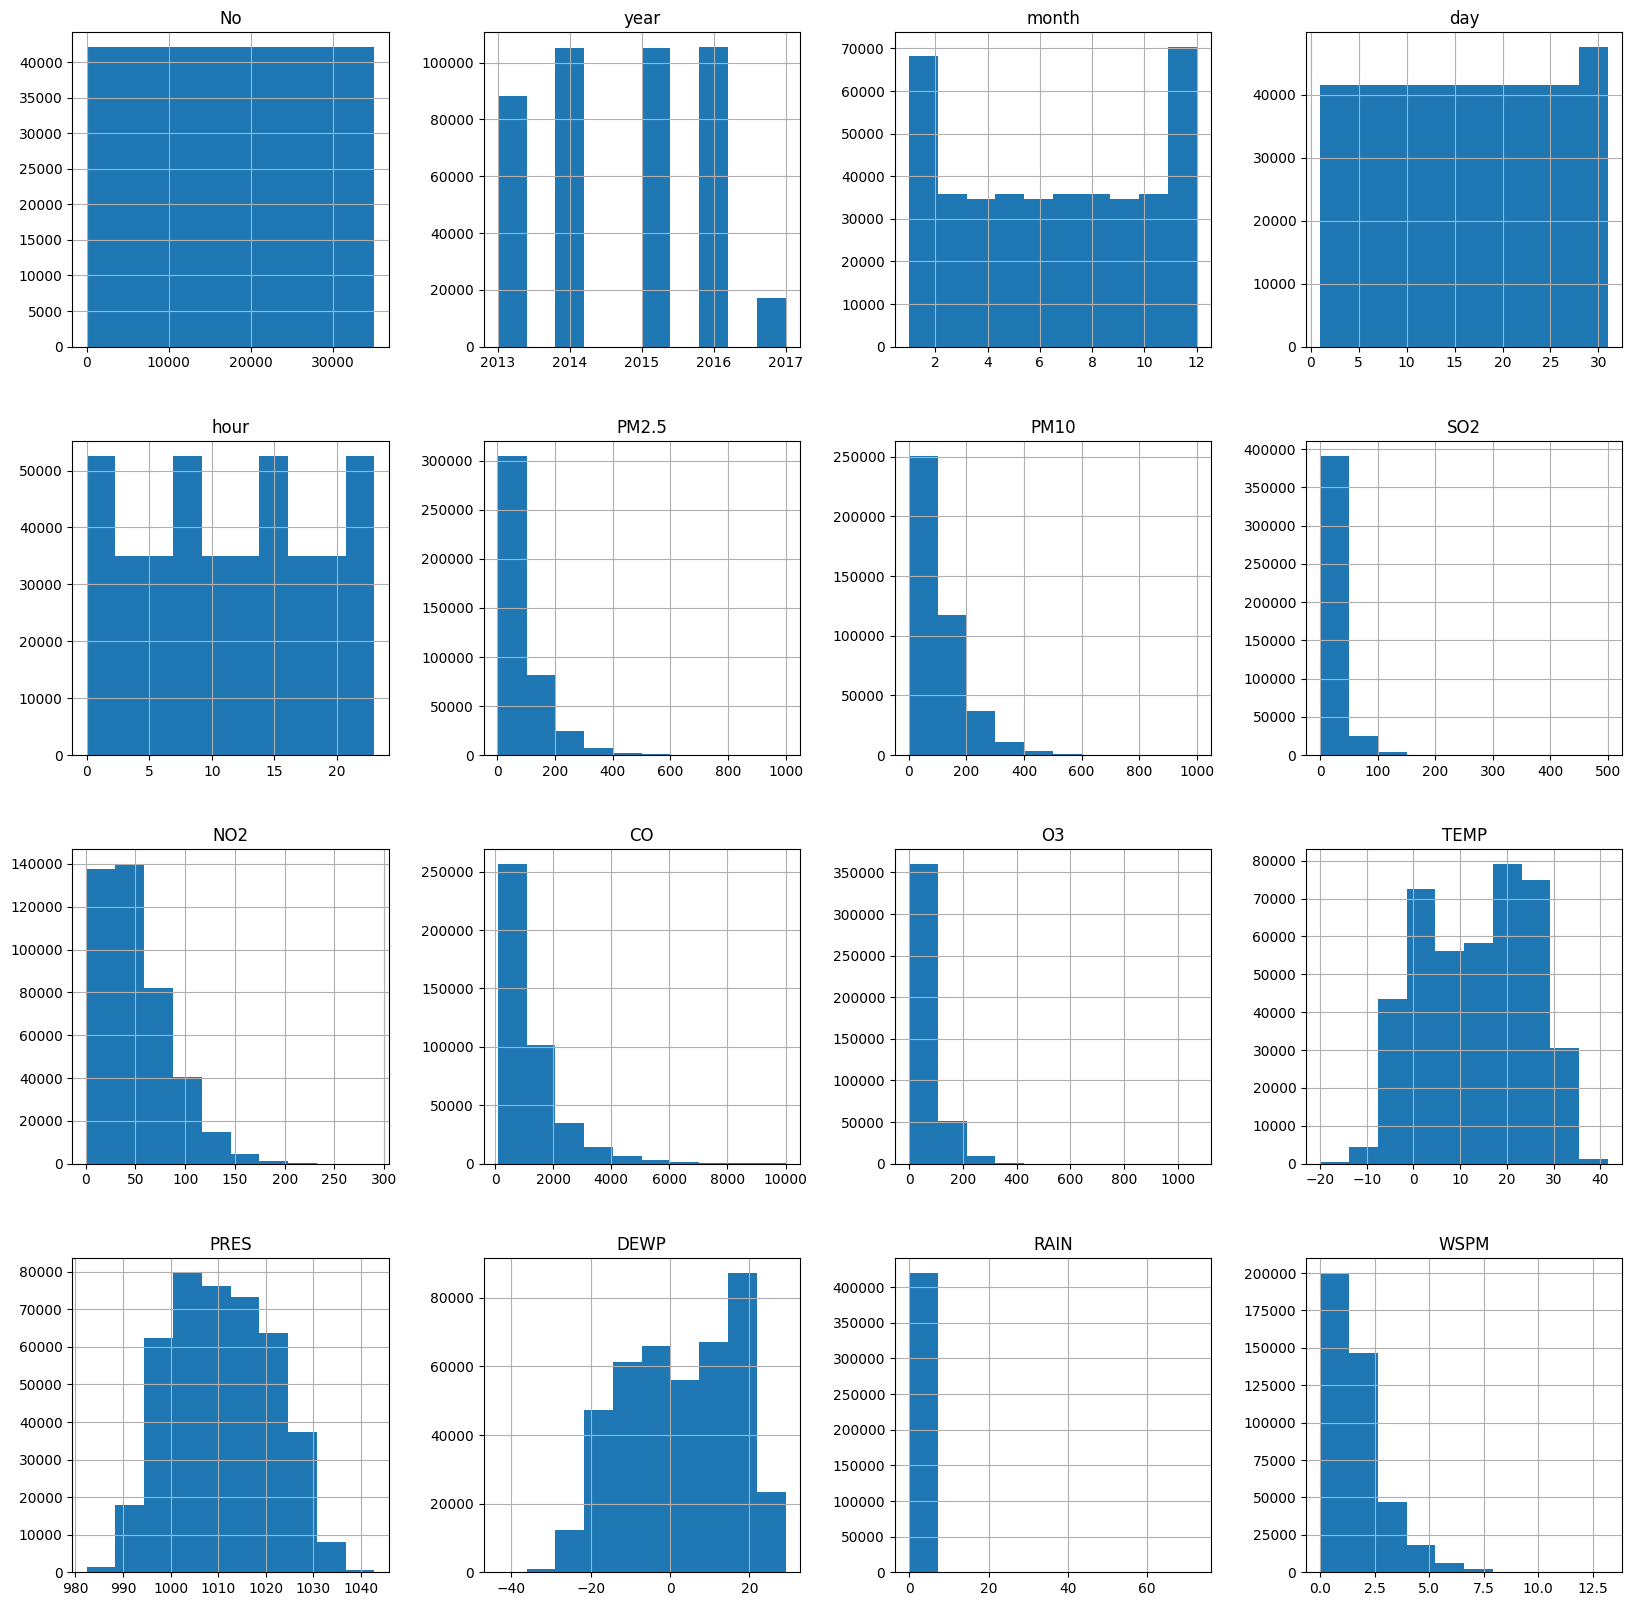

In [14]:
# melihat distribusi data
data.hist(figsize=(20,20))
plt.show()

untuk peneyebaran nilai data terutama pada PM2.5, PM10, SO2, NO2, CO, C3, WSPM penyebaran data cenderung kearah kanan

In [15]:
# mengambil data column numeric
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns = numeric_columns[5:]

In [16]:
# melihat rata-rata data tiap stasiun
data.groupby('station')[numeric_columns].mean()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,82.040934,109.485803,17.334701,59.052964,1244.561887,55.796764,13.584581,1011.846292,3.122702,0.067419,1.708505
Changping,70.744359,94.447773,14.974522,44.304903,1141.357061,57.717103,13.685889,1007.764537,1.506985,0.060372,1.853684
Dingling,65.745349,83.707175,11.834616,28.396770,904.615132,67.733070,13.685889,1007.764537,1.506985,0.060372,1.853684
Dongsi,85.527068,109.889839,18.480049,53.559686,1290.857090,56.979406,13.671414,1012.546392,2.447559,0.064020,1.860732
Guanyuan,82.442642,108.692679,17.567148,57.765139,1252.731776,55.433916,13.584581,1011.846292,3.122702,0.067419,1.708505
Gucheng,83.320534,118.461442,15.372880,55.771391,1307.034309,57.430945,13.864051,1008.832326,2.610268,0.064453,1.343773
Huairou,69.228839,91.272559,12.225223,33.345232,1017.584417,59.338082,12.447016,1007.603327,2.239001,0.067934,1.652129
Nongzhanguan,84.304073,108.652398,18.652884,57.949975,1309.754991,58.339367,13.671414,1012.546392,2.447559,0.064020,1.860732
Shunyi,78.853887,98.475451,13.655526,44.170845,1169.233003,54.768120,13.388189,1013.058571,2.465075,0.061099,1.807435


perbandingan rata-rata tiap column terhadap tiap stasiun memiliki rata-rata kurang lebih sama

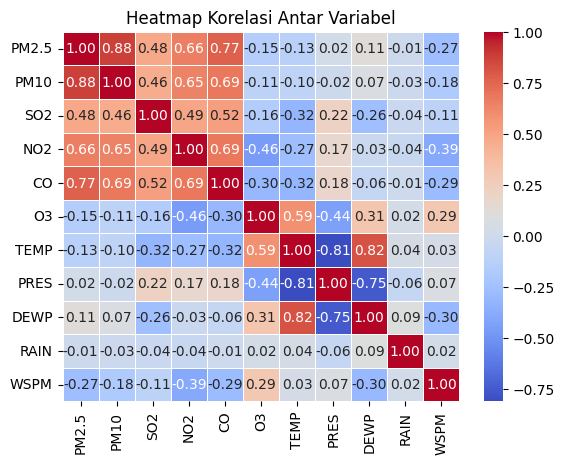

In [17]:
# melihat korelasi antar variable
# plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Pada column PM2.5, PM10, S02, N02 dan CO memiliki korelasi positif yang mana tiap columns saling mempengaruhi


## Visualization & Explanatory Analysis
membuat hasil visualiasi pada data untuk mempermudah memahami data. Dalam hal ini   memahami struktur, pola, dan distribusi data dengan lebih baik dari pada melihat hanya melalui angka serta dapat mengkomunikasikan data agar lebih dimengerti oleh stakeholder

### Pertanyaan 1: Bagaimana tren kualitas udara selama tahun 2013-2017?

In [31]:
# menambah column date
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

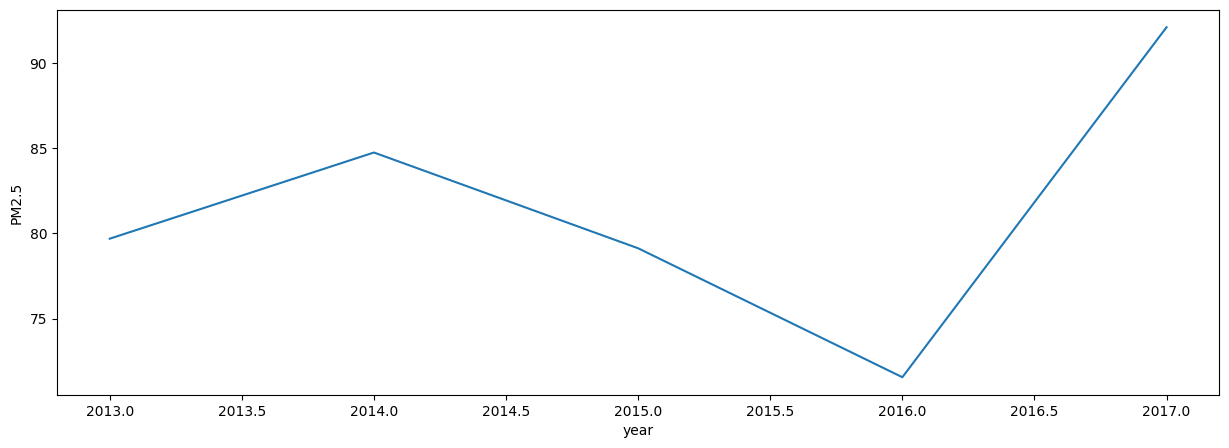

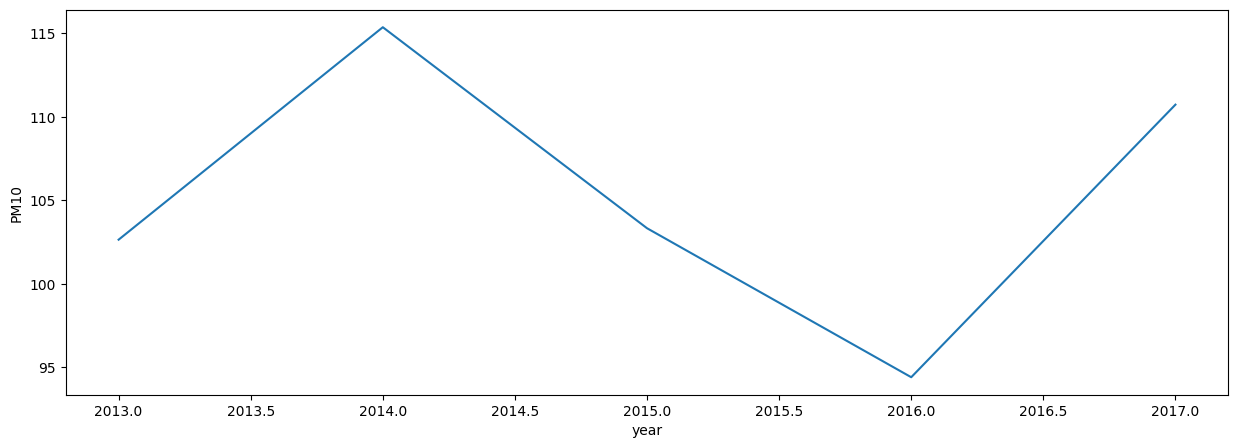

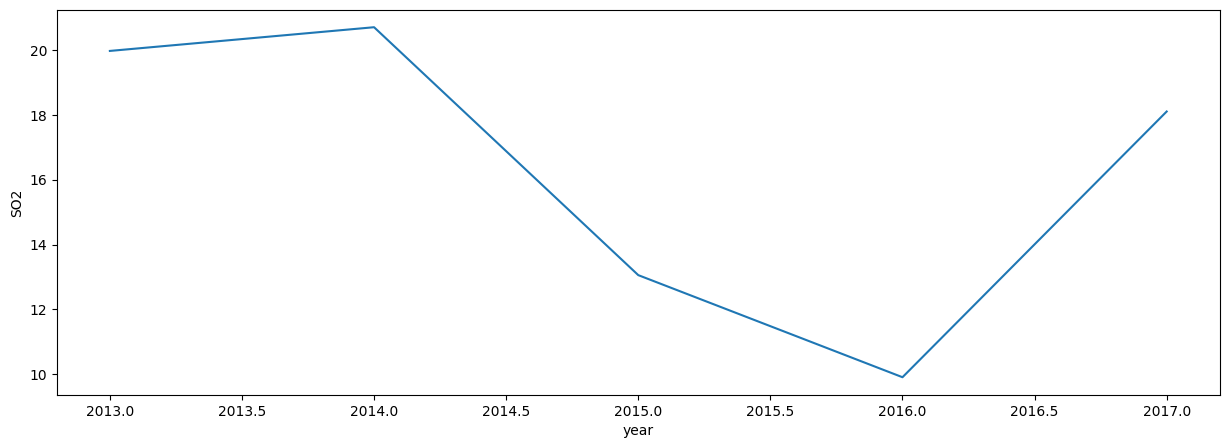

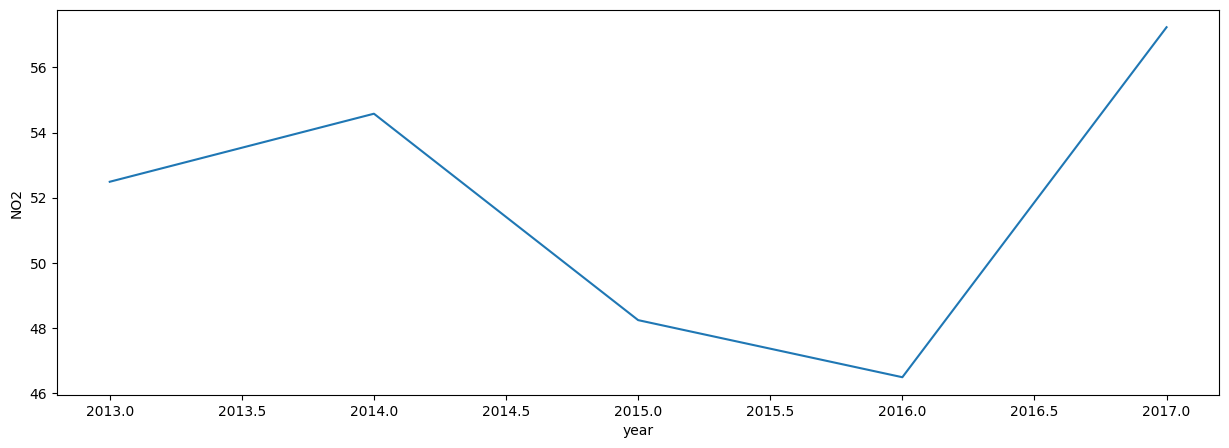

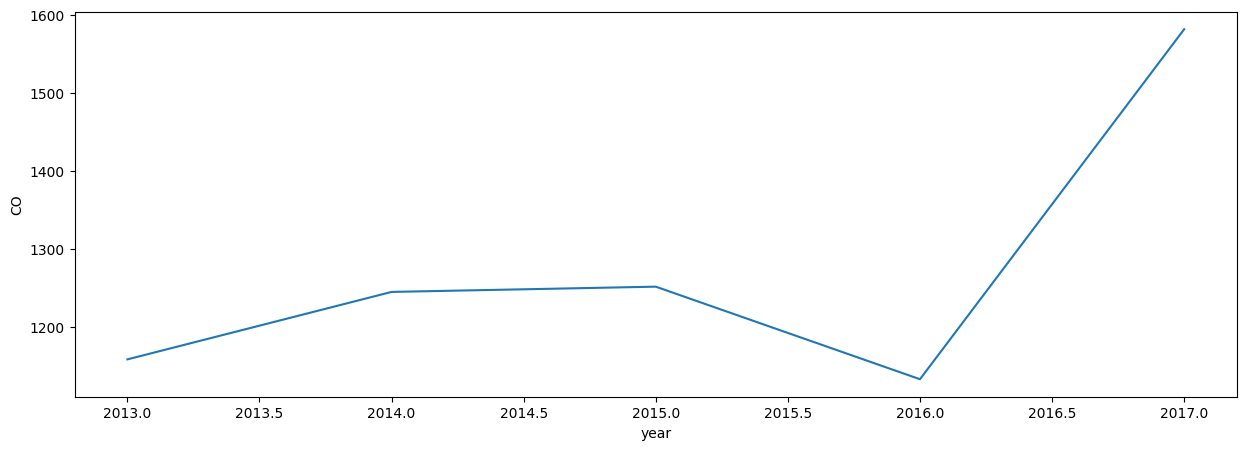

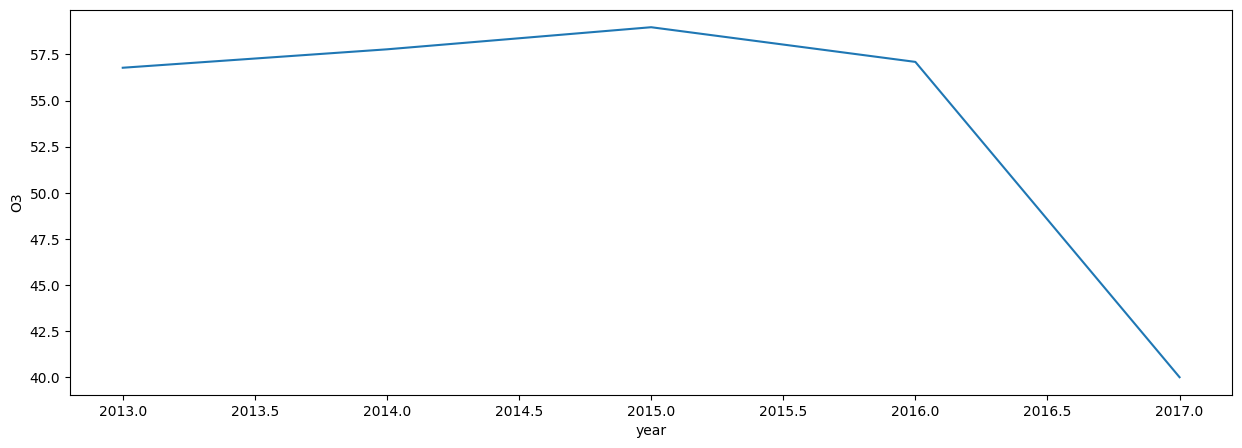

In [32]:
# melihat kualitas udara tiap tahun pada kualitas uadara
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in polutant:
    df = data[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.lineplot(x='year', y=i, data=df)

pada plot waktu tiap tahun pada column NO2,  SO2, PM10, PM2.5, memiliki pola yang sama. Pada tahun 2014 mengalami penurunan secara bersamaan. Lalu pada tahun 2016 terjadi anomali dimana tiap column mengalami peningkatan dan penurunan secara terus menerus

### Pertanyaan 2: Bagaimana perbandingan kualitas udara antar lokasi tiap tahunnya?

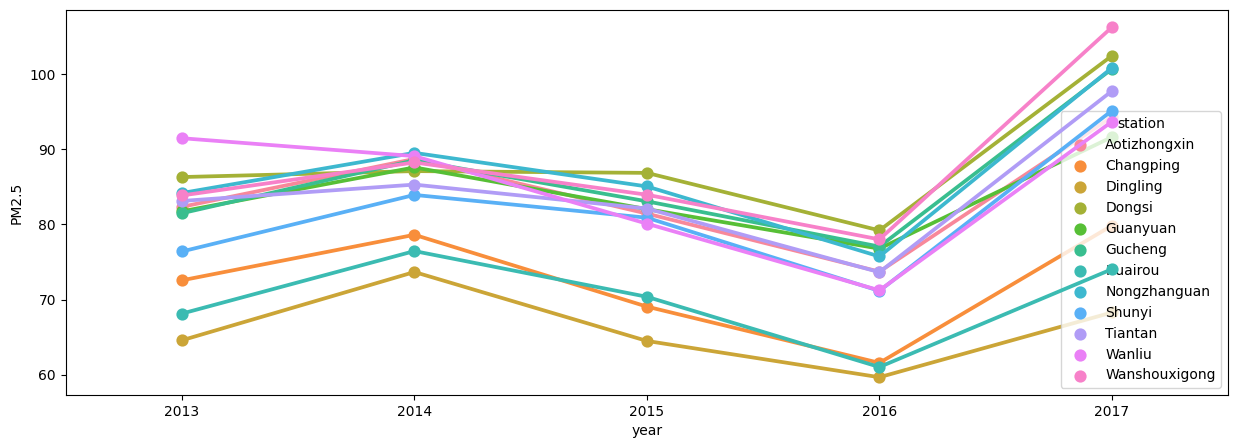

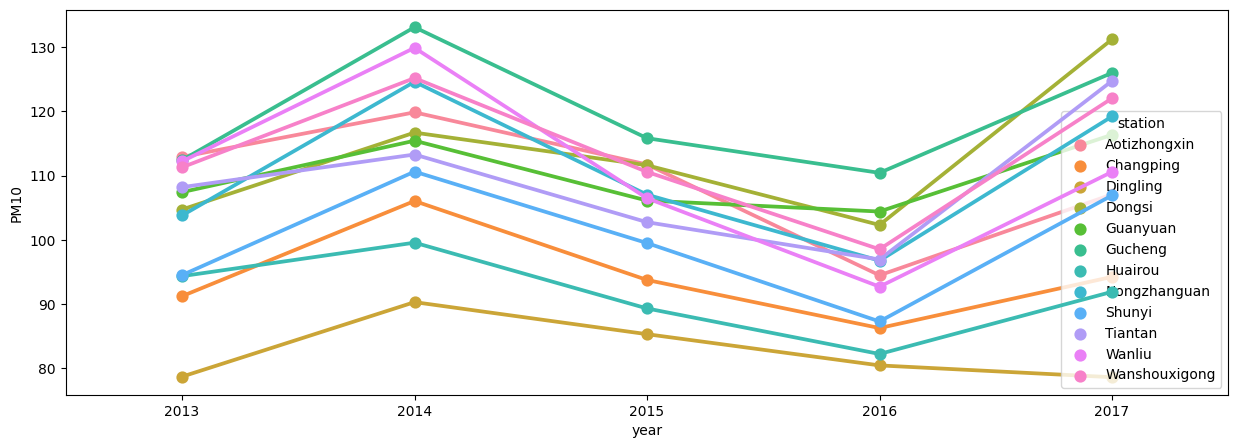

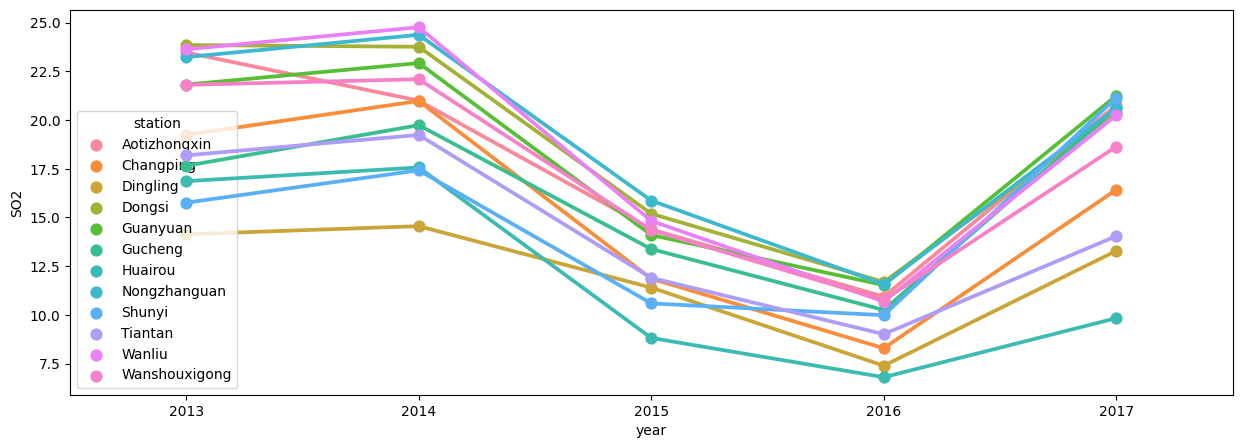

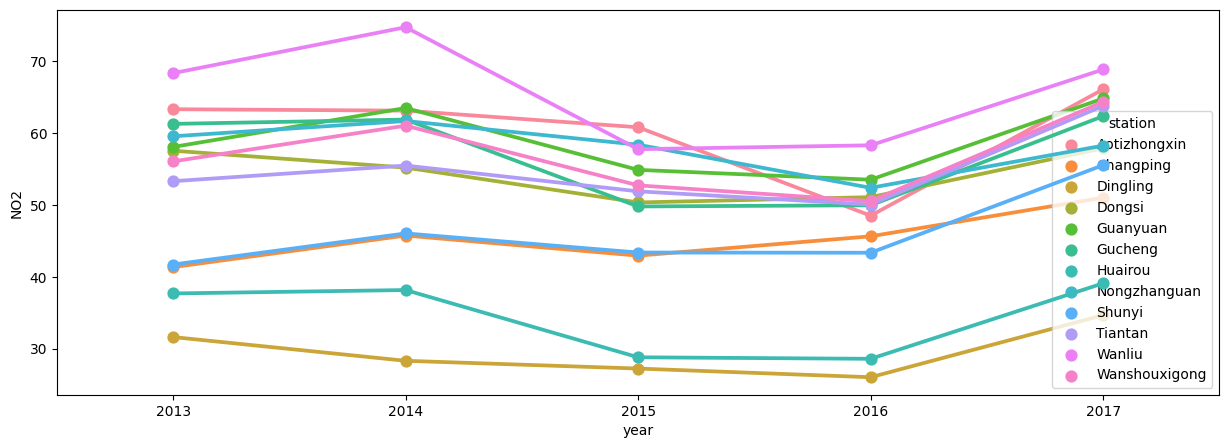

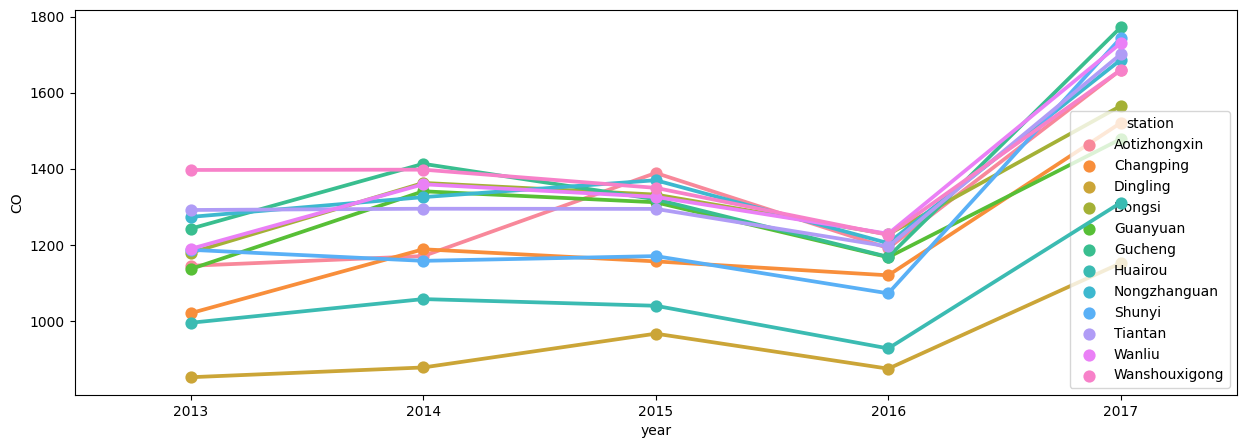

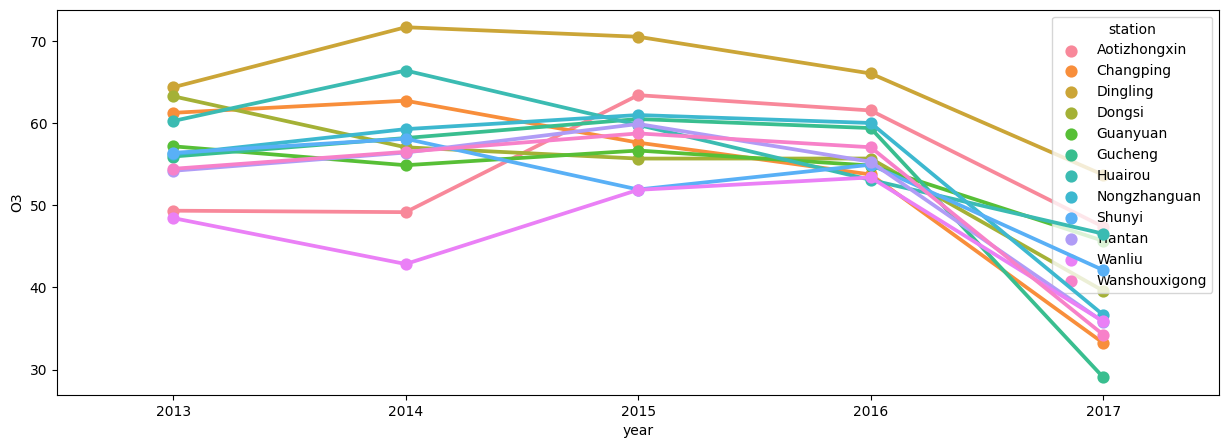

In [33]:
# Melihat perbandingan kualitas udara tiap tahun berdasarkan lokasinya
for i in polutant:
    df = data[[i, 'year', 'station']].groupby(["year","station"]).mean().reset_index().sort_values(by=['station','year'])
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df, hue="station")
    plt.show()

Pada perbandingan kualitas udara berdasarkan parameter zat yang terkandung, stasiun Dingling memiliki kualitas udara yang baik karena nilai tiap parameternya yang rendah kecuali pada parameter O3, stasiun dingling memiliki nilai tertinggi. Untuk stasiun yang memiliki kualitas udara yang paling buruk berdasarkan parameter secara keseluruhan Wanliu, yang mana tiap parameter zatnya diatas rata-rata pada keseluruhan stasiun

## Analisis Lebih Lanjut : Time Series Analysis

Analisis yang dilakukan untuk melihat pola tren tiap waktu pada setiap parameter yang mempengaruhi kualitas udara

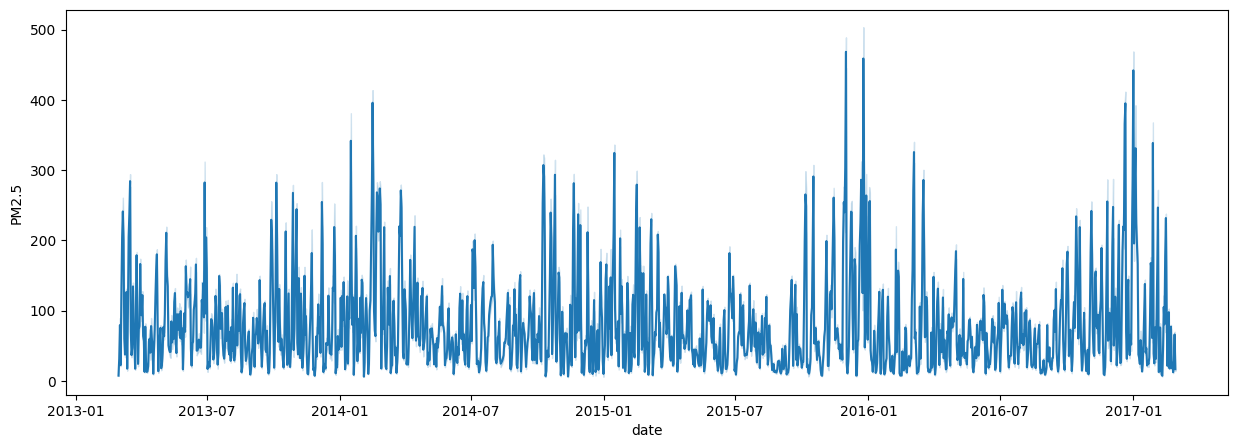

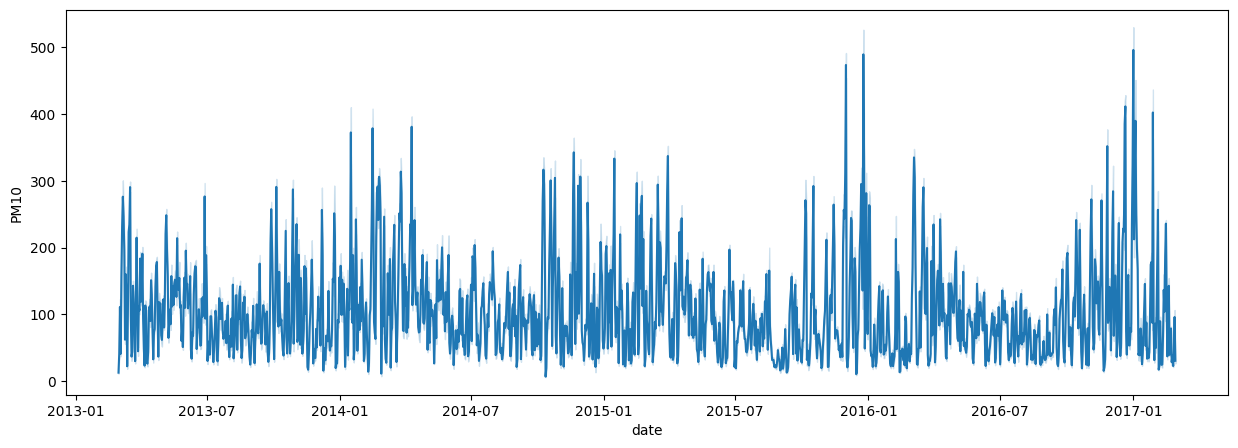

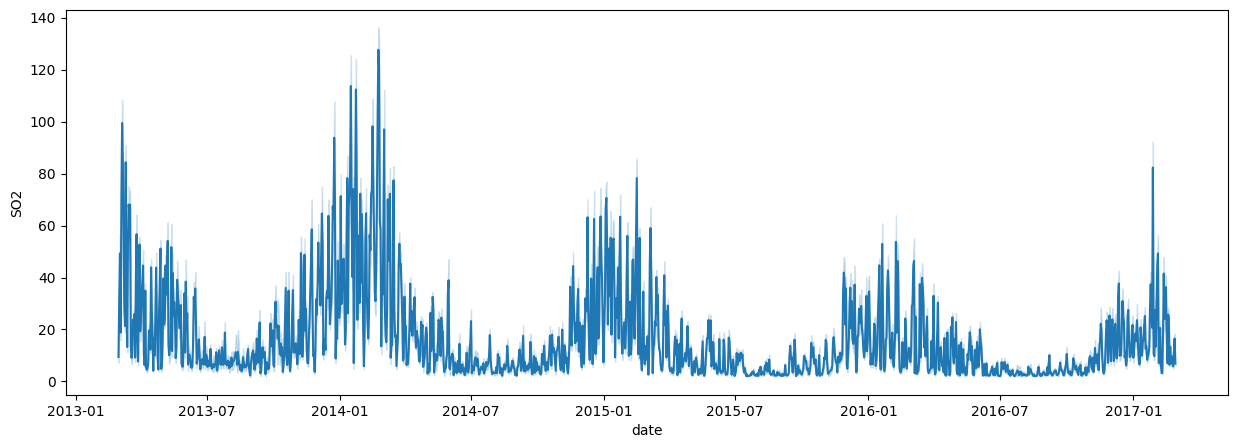

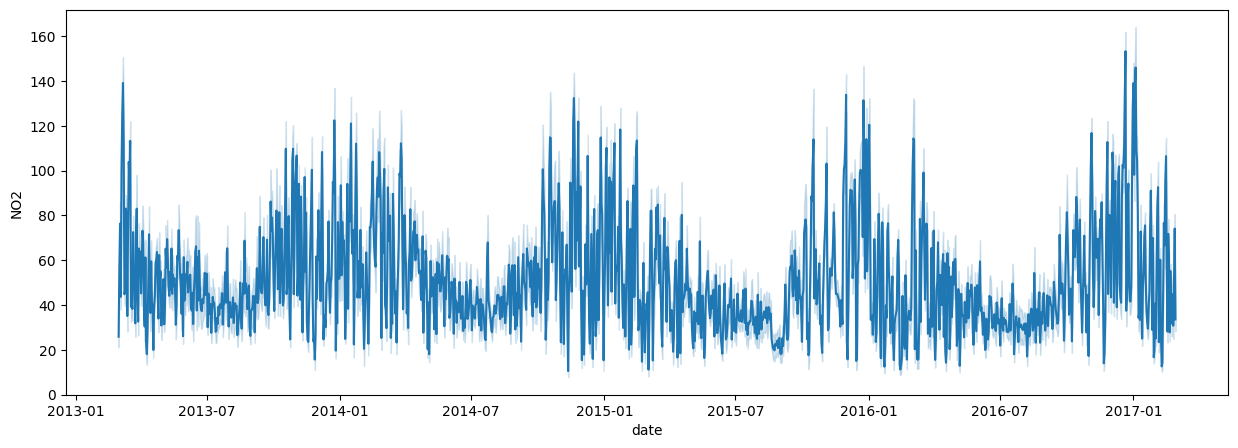

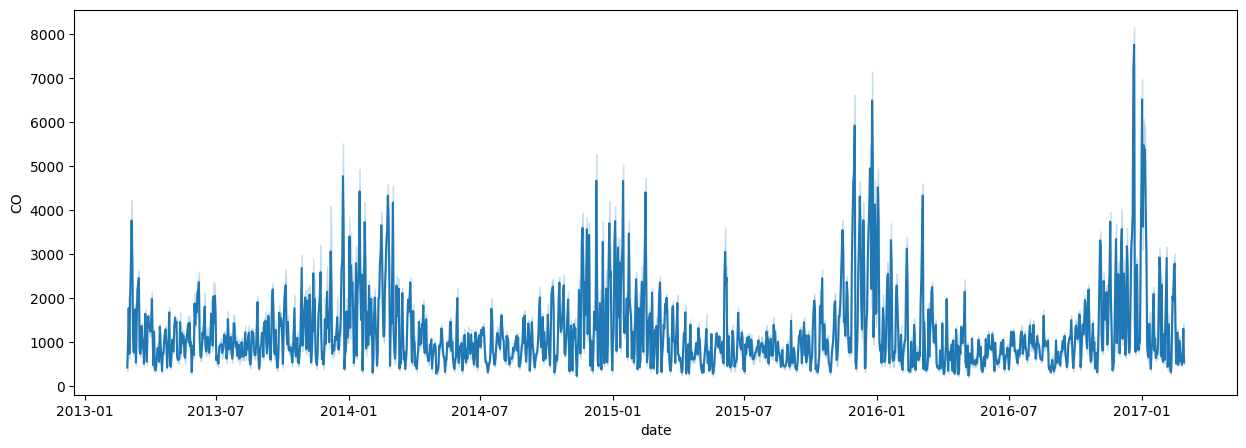

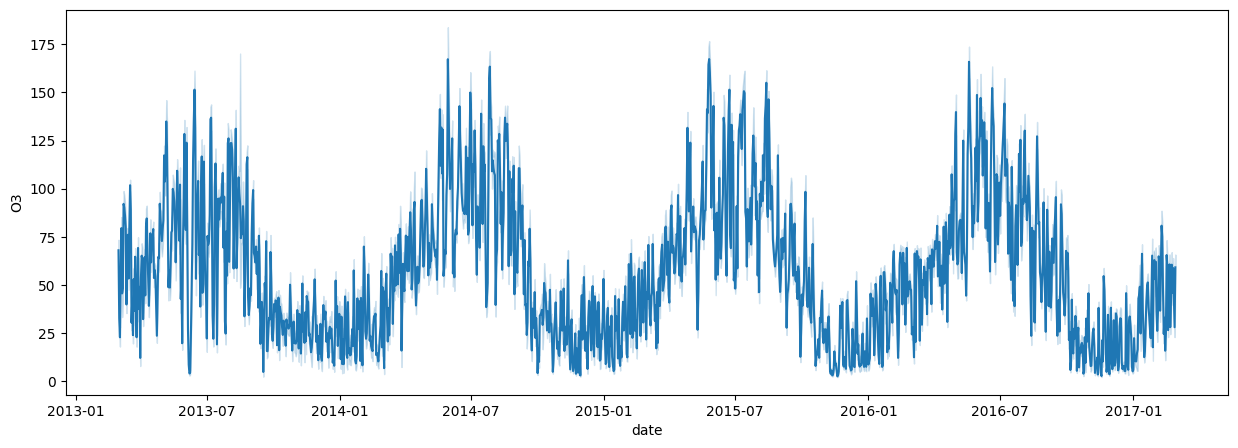

In [34]:
# Melihat perbandingan kualitas udara tiap tahun berdasarkan lokasinya
for i in polutant:
    df = data[[i, 'date', 'station']].groupby(["date","station"]).mean().reset_index().sort_values(by=['date'])
    fig, ax=plt.subplots(figsize=(15, 5))
    sns.lineplot(x='date', y=i, data=df)
    plt.show()

pada parameter O3, NO2 dan SO2 terlihat plot deret waktu berupa musiman dimana terdapat pola yang berulang, untuk mengetahui penyebab dapat dilakukan analisis lebih dalam lagi. pada parameter lainnya plot deret waktu berupa noisy time series, yang mana terdapat banyak data random sehingga sulit utuk melakukan analisis

## Conclusion

- Bagaimana Tren kualitas udara selama tahun 2013-2017?

pada hasil analisis, bahwa pada tahun 2014 merupakan titik tertinggi kualitas udara yang buruk, selanjutnya mengalami perbaikan kualitas udara hingga 2016, akan tetapi setelah 2016 mengalami penurunan kualitas udara menjadi lebih buruk

- Bagaimana perbandingan kualitas udara antar lokasi tiap tahunnya?

Stasiun yang memiliki kualitas terbaik dibandingkan yang lain merupakan stasiun Dingling dan stasiun yang memiliki kualitas terburuk terdapat pada Wanliu